# Manually choosing parameters, SARIMA(p,d,q)(P,D,Q)m

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sarimax import pre_process
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pmd
from sarimax import find_parameters
import numpy as np

In [3]:
df = pre_process(csv_data_file_path='./Data/Bill_Bryson_Data.csv', resample_period='H')
df = df.iloc[100:-100] # Last values are empty for the holidays, so barely any attendance (ignore due to small data size)
df = df[['Total']]
print(df.head())

                      Total
Datetime                   
2023-07-19 21:00:00  1774.0
2023-07-19 22:00:00  1800.0
2023-07-19 23:00:00  1800.0
2023-07-20 00:00:00  1800.0
2023-07-20 01:00:00  1800.0


In [4]:
print(adfuller(df['Total']))
# Statistically test for stationary (weak) data, as prerequisite for ARIMA
# Critical value if within range of CI, hence we don't have evidence to reject H0 (data is not stationary)

(-2.7460770566030535, 0.06639863032465267, 18, 438, {'1%': -3.445368352170937, '5%': -2.8681614049724002, '10%': -2.570296970872167}, 3177.907118480898)


Not stationary, so we apply differencing.

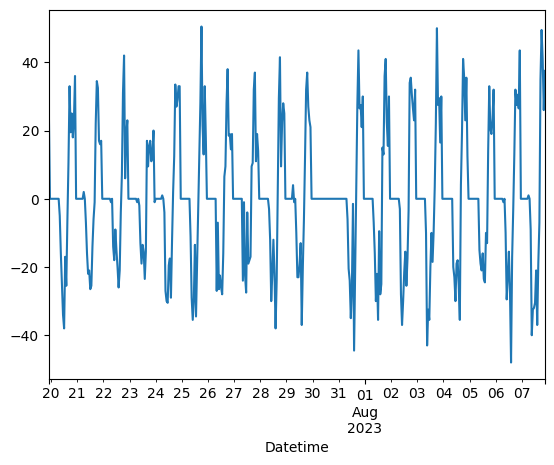

(-12.216216770490806, 1.1340475641077847e-22, 18, 437, {'1%': -3.4454029241336483, '5%': -2.8681766097362087, '10%': -2.570305075326362}, 3175.932757770338)


In [5]:
df_diff = df.diff().iloc[1:] # could also just do dropna() but want to be sure exactly what's happening
df_diff['Total'].plot()
plt.show()
print(adfuller(df_diff['Total']))# Makes a statistically significant different!

In [6]:
# df['Total'] = np.log(df['Total'])# could also just do dropna() but want to be sure exactly what's happening
# df['Total'].plot()
# plt.show()
# print(adfuller(df['Total']))# Makes a statistically significant different!

In [7]:
# Could also use pmdarima package to automatically find differencing...
ndiff = pmd.arima.ndiffs(df['Total'], test='adf')
print(f"Number of differencing recommended {ndiff}")
# pmd.arima.nsdiff() to get seasonality differencing

Number of differencing recommended 0


As test statistic for a single differencing is less than the  critical value for a significance level of 0.5, we have sufficient evidence to reject the null that it is not stationary). Hence, d = 1

0
(-5.237930333013186, 7.352544046944016e-06, 6, 426, {'1%': -3.4457939940402107, '5%': -2.8683485906158963, '10%': -2.570396746236417}, 3043.7577408013267)


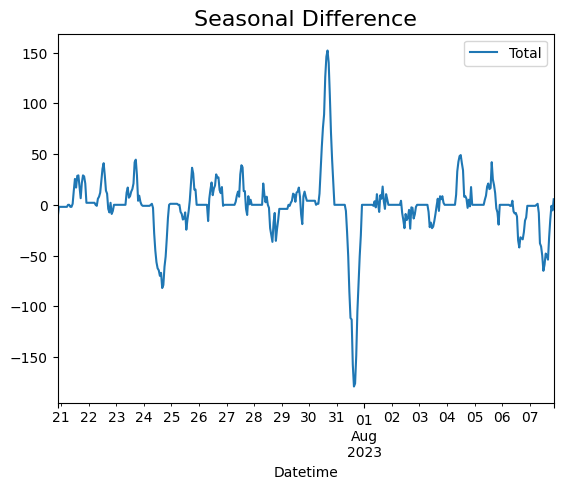

In [8]:
print(pmd.arima.ndiffs(df))
df_diff_season = df.diff(24)
df_diff_season = df_diff_season.dropna()
df_diff_season.plot()
plt.title("Seasonal Difference", fontsize=16)

print(adfuller(df_diff_season))
# From ADT test we can determine that a differencing with a lag of m=24 will make our data stationary. So we have D = 1

With observation and exploration (seasonal_decomposition, acf and pacf plots), I believe I should difference both d=1 and D=1. However, the pmdarima functions ndiffs() and nsdiff() suggest I shouldn't. I will continue doing so, but check back once I have more data.

/var/folders/gg/2xgfrwhs60j8qg5zm5gbky_c0000gn/T/ipykernel_65292/1315492487.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


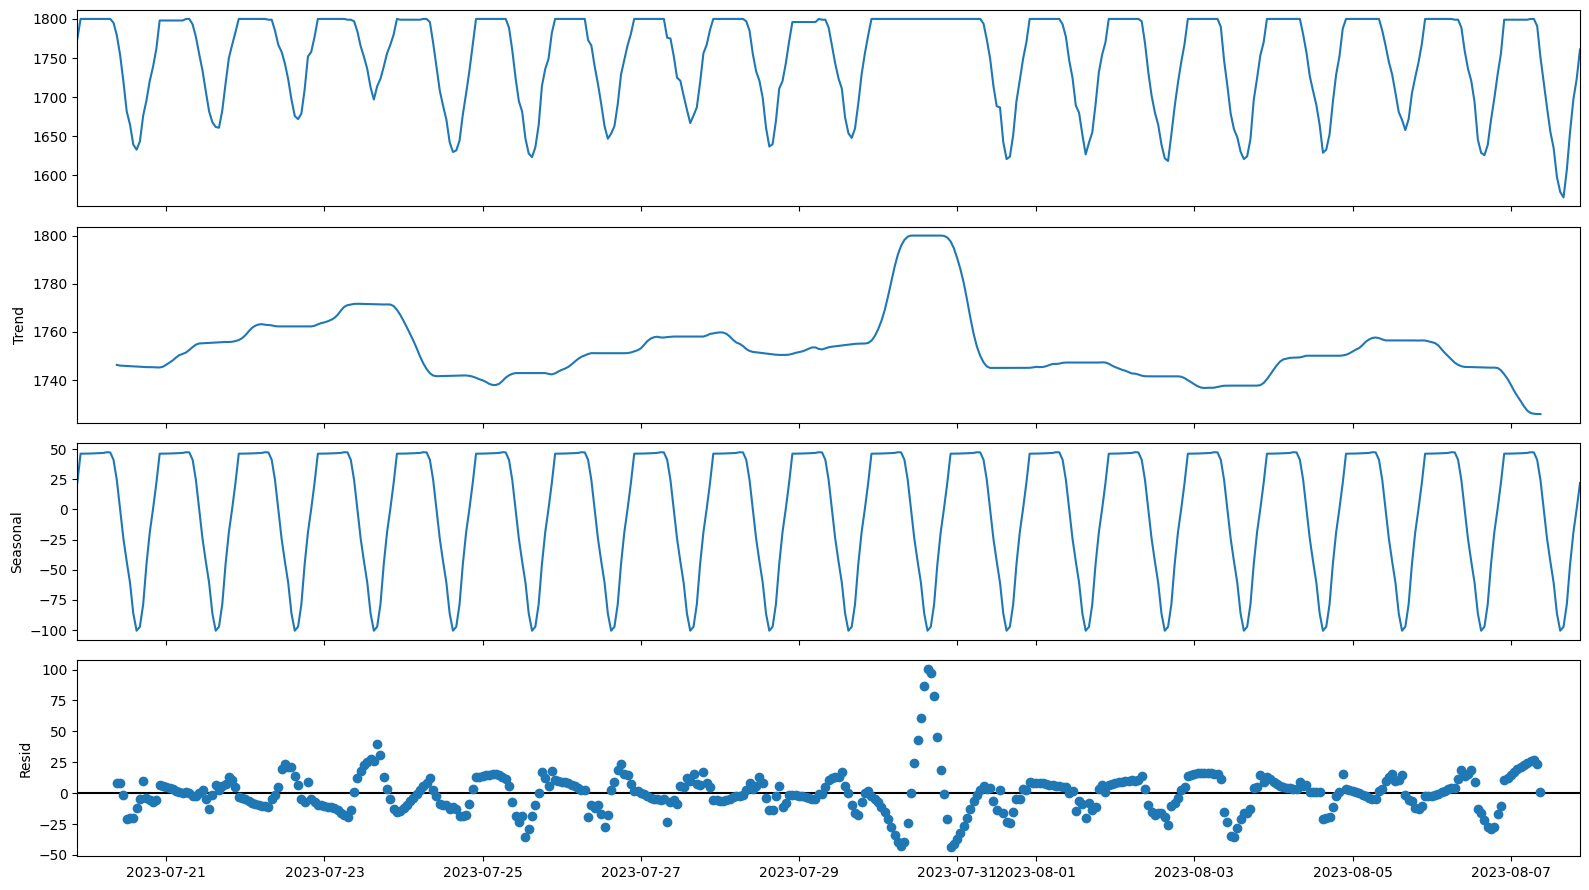

In [9]:
fig = seasonal_decompose(df).plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

# Data visually seems to follow stationary patterns
# Very strong seasonal component, (S)ARIMA

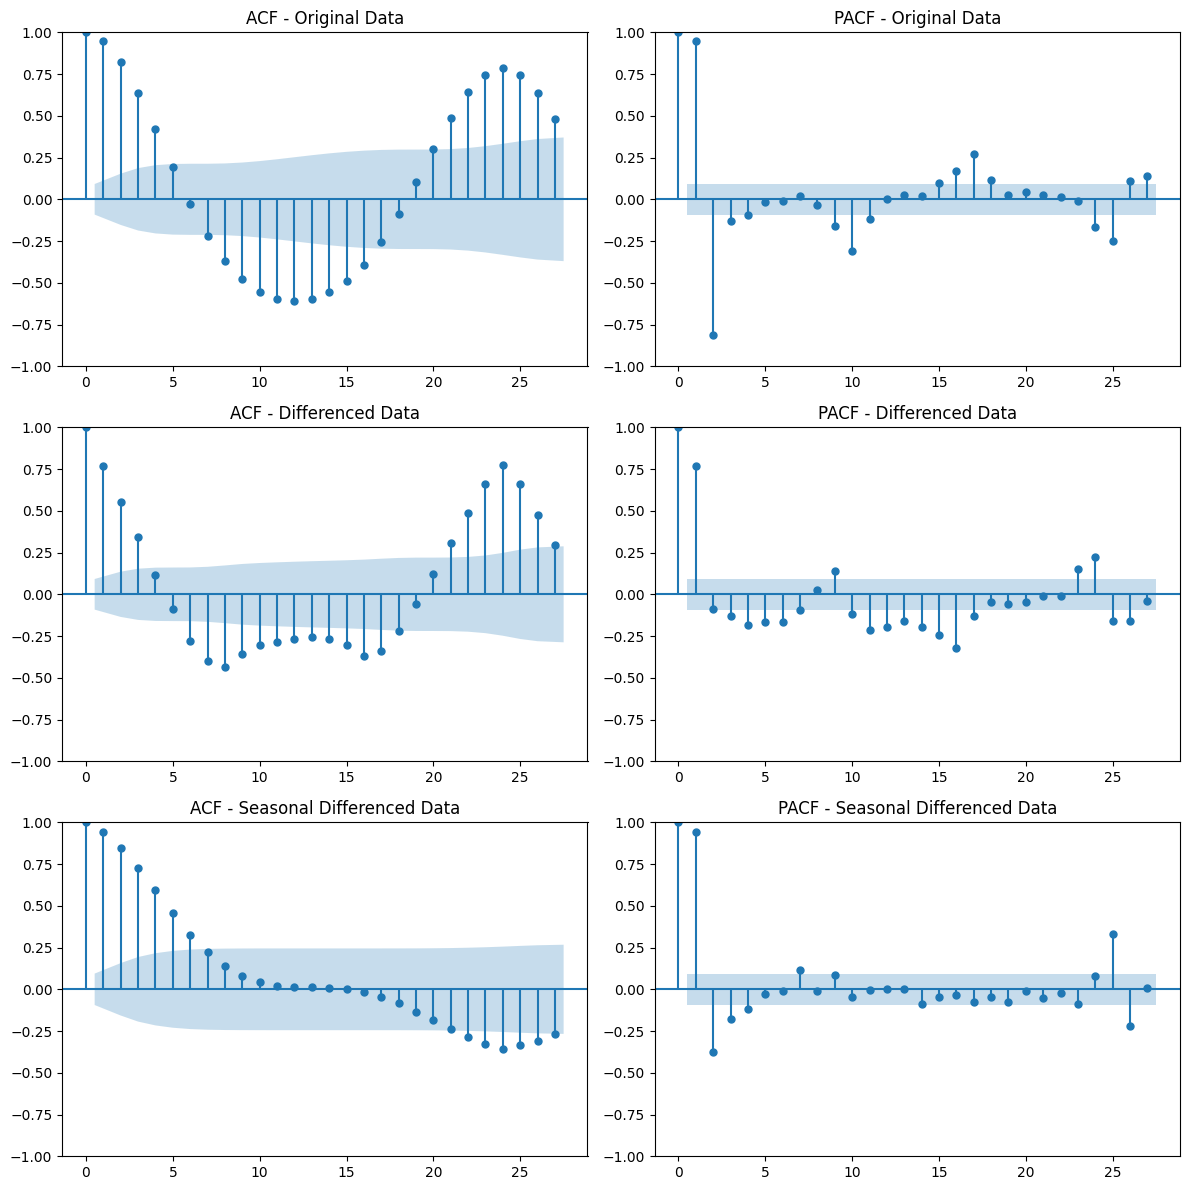

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

plot_acf(df, ax=axes[0, 0], title='ACF - Original Data')
plot_pacf(df, ax=axes[0, 1], title='PACF - Original Data')

plot_acf(df_diff, ax=axes[1, 0], title='ACF - Differenced Data')
plot_pacf(df_diff, ax=axes[1, 1], title='PACF - Differenced Data')

plot_acf(df_diff_season, ax=axes[2, 0], title='ACF - Seasonal Differenced Data')
plot_pacf(df_diff_season, ax=axes[2, 1], title='PACF - Seasonal Differenced Data')

plt.tight_layout()
plt.show()

In [ ]:
find_parameters(df=df, col='Total')
find_parameters(df=df_diff, col='Total')
find_parameters(df=df_diff_season, col='Total')



 ARIMA(1,0,0)(1,0,2)[24] intercept   : AIC=inf, Time=8.35 sec
 ARIMA(0,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=14.30 sec
 ARIMA(2,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=16.60 sec
 ARIMA(1,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=21.70 sec
 ARIMA(0,0,1)(2,0,1)[24] intercept   : AIC=4193.453, Time=12.30 sec
 ARIMA(2,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=24.07 sec
